[Make Moons dataset](https://https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [2]:
# The feature matrix X (the coordinates of the points) and the target vector _ (the class labels).
# The underscore _ is used to ignore the target vector.
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

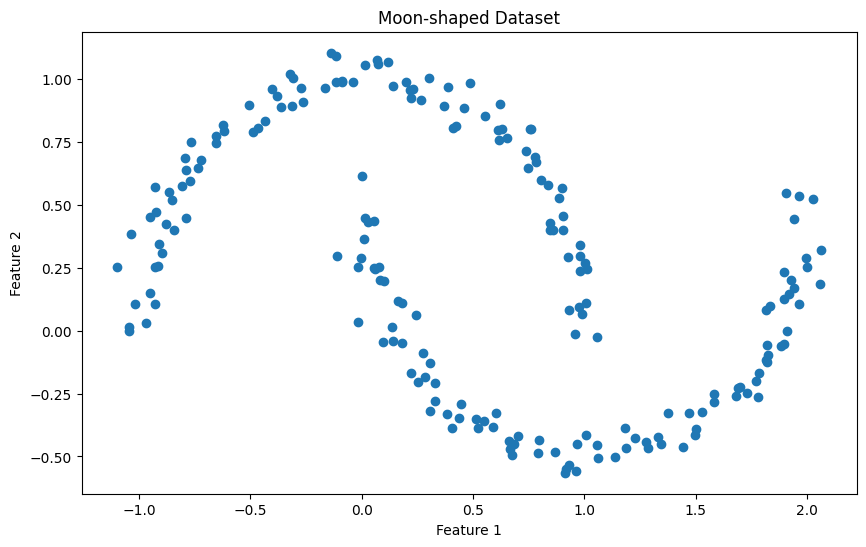

In [3]:
# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Moon-shaped Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Determining the epsilon parameter

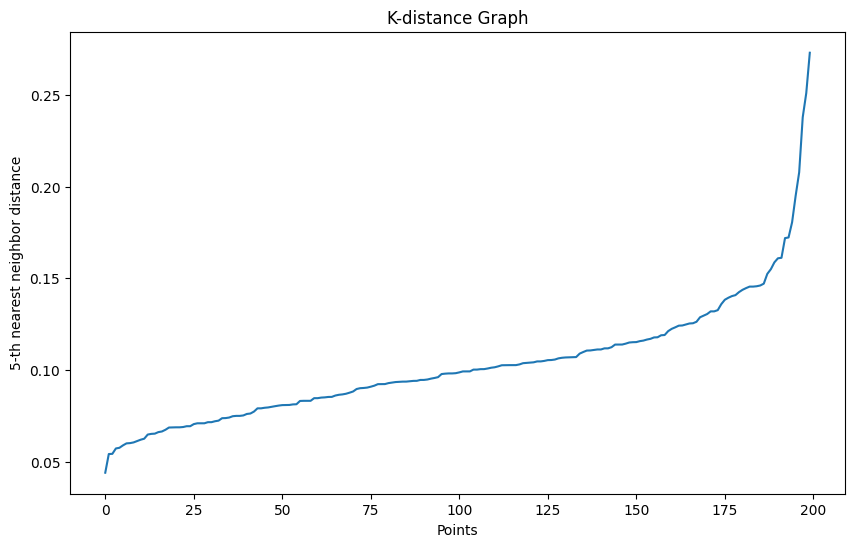

In [14]:
# Function to plot k-distance graph
def plot_k_distance_graph(X, k):
    #  Nearest Neighbors Calculation
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    # Sorting Distances
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()
# Plot k-distance graph
plot_k_distance_graph(X, k=5)

### Performing DBSCAN clustering

In [5]:
# Perform DBSCAN clustering
epsilon = 0.15  # Chosen based on k-distance graph
min_samples = 5  # 2 * num_features (2D data)
# Initialize DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
# Fit and Predict Clusters
clusters = dbscan.fit_predict(X)

### Visualizing the results

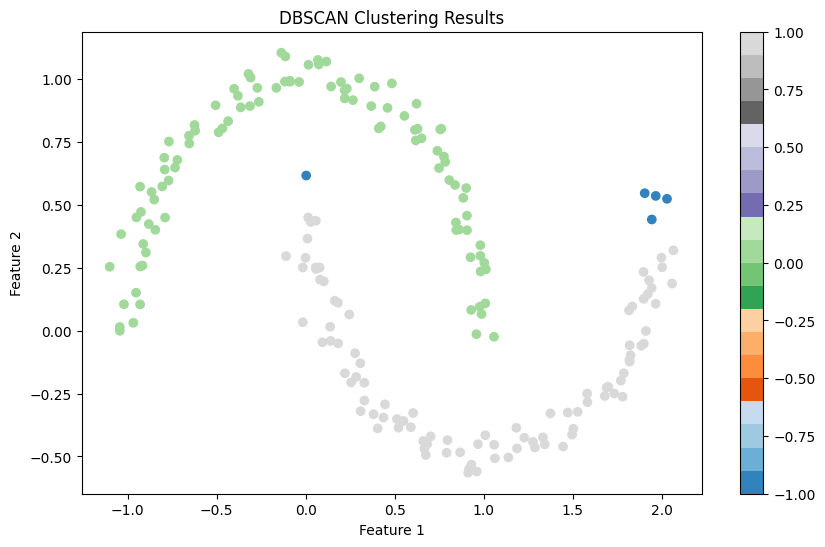

In [11]:
# Visualize the results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='tab20c')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Interpreting the results

In [12]:
# Print number of clusters and noise points
# set(clusters) creates a set of unique cluster labels.
#len(set(clusters)) counts these unique labels.
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
# list(clusters).count(-1) counts how many times -1 appears in the clusters list, representing the number of noise points.
n_noise = list(clusters).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

Number of clusters: 2
Number of noise points: 5


### Visual comparison

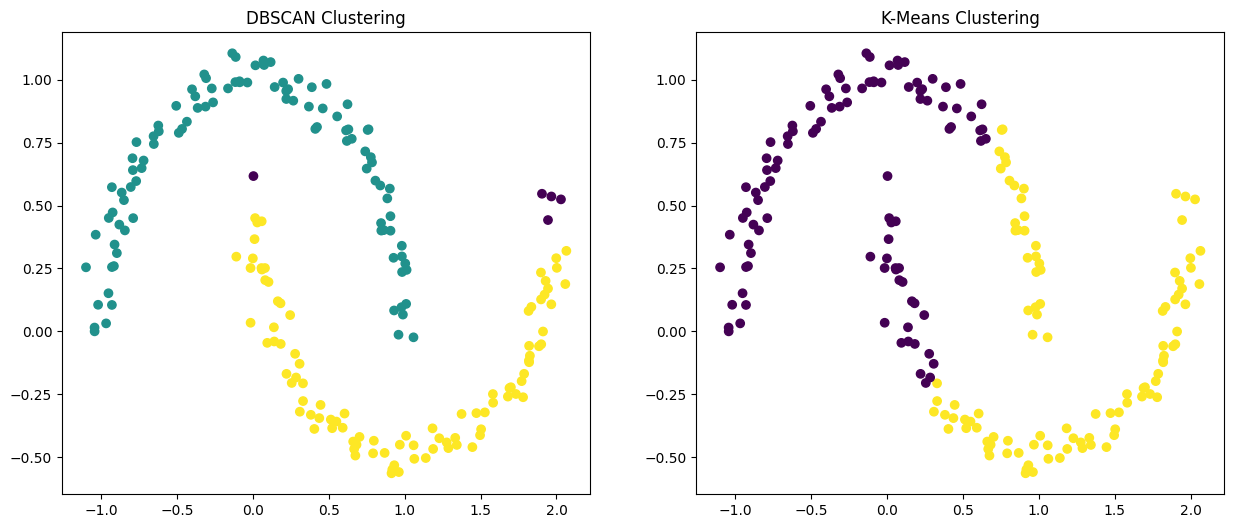

In [15]:
from sklearn.cluster import KMeans

# DBSCAN clustering
dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
ax1.set_title('DBSCAN Clustering')

ax2.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
ax2.set_title('K-Means Clustering')

plt.show()